In [0]:
# Using pytorch tutorial 
# https://github.com/pytorch/examples/tree/master/mnist
# https://nextjournal.com/gkoehler/pytorch-mnist

# TODO 
# Inference by loading model and passsing into image

# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

import os
from google.colab import drive 

In [0]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

def train(log_interval, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [0]:
use_cuda = not False and torch.cuda.is_available()

torch.manual_seed(1)

device = torch.device("cuda" if use_cuda else "cpu")

batch_size=64
test_batch_size=1000
lr=0.01
momentum=0.5

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=test_batch_size, shuffle=True, **kwargs)


model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)


In [0]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [21]:
example_data.shape

torch.Size([1000, 1, 28, 28])

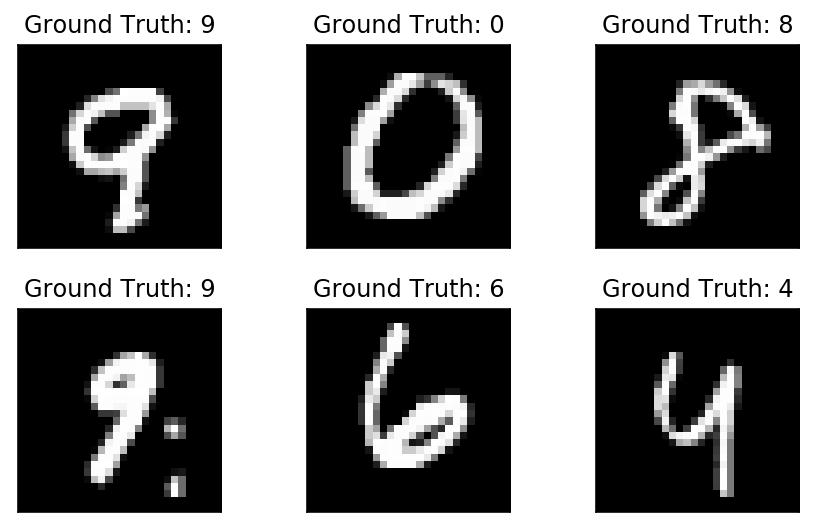

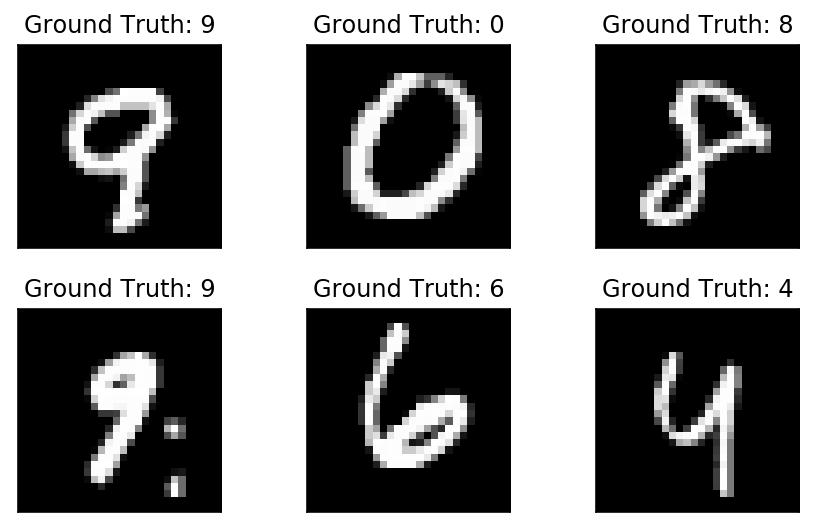

In [22]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [27]:
for epoch in range(1, 10 + 1):
    train(10, model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)


torch.save(model.state_dict(),"mnist_cnn.pt")


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.291340
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.226841
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.139306
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.003811
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.745064
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.428748
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.053957
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.768116
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.844016
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.506139
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.425677
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.448089
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.613346
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.324516
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.648004
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.295262
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.522862
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.453673
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.468865
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.379229
Train Epoch: 1 [12800/60000 (